# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
file_1 = open('/Users/cmdb/Downloads/aau1043_dnm.tsv')
file_2 = open('/Users/cmdb/Downloads/aau1043_parental_age.tsv')

df = pd.read_csv(file_1)
df_ages = pd.read_csv(file_2)

df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df_ages

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [4]:
df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [5]:
df["Proband_id"].value_counts()

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: Proband_id, Length: 396, dtype: int64

In [6]:
mother = df.loc[df["Phase_combined"] == "mother"]
mother["Proband_id"].value_counts()

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

In [7]:
father = df.loc[df["Phase_combined"] == "father"]


father["Proband_id"].value_counts()

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [8]:
df["Proband_id"].value_counts()

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: Proband_id, Length: 396, dtype: int64

In [9]:
roi = df["Phase_combined"] == "father"
df_father = df.loc[roi]

roi = df["Phase_combined"] == "mother"
df_mother = df.loc[roi]

df_new = df["Proband_id"]
df_mat = pd.DataFrame(df_mother["Proband_id"].value_counts())
df_pat = pd.DataFrame(df_father["Proband_id"].value_counts())
df_total = pd.DataFrame(df["Proband_id"].value_counts())

df_new = pd.DataFrame(df_new)
df_pat['mat_dnm'] = df_mat
df_pat['tot_dnm'] = df_total
df_final = df_pat

df_final.columns = ['pat_dnm' , 'mat_dnm' , 'tot_dnm']
df_final

,pat_dnm,mat_dnm,tot_dnm
91410,111,10,122
114094,98,22,121
111288,93,21,115
99984,91,12,103
64166,88,16,105
...,...,...,...
76504,27,5,34
1097,26,12,39
13990,25,7,33
36430,25,16,42


In [10]:
df_final.index.name = 'Proband_id'


In [11]:
df_final.reset_index(inplace=True)
df_final

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


In [12]:
df_merge = pd.merge(df_final, df_ages, on = 'Proband_id')
df_merge

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


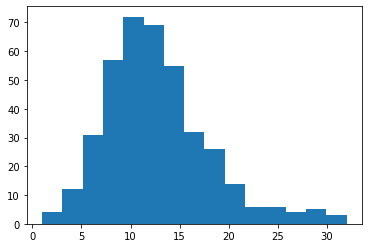

In [23]:
fig, ax = plt.subplots()
ax.hist(df_final["mat_dnm"], bins = 15) #increase # of bars?? called bins?
plt.show()

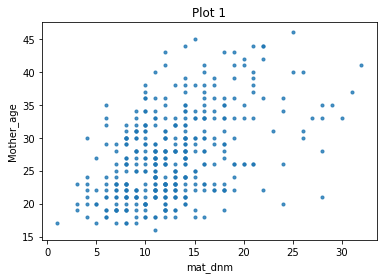

In [15]:
# Create data

x = df_merge["mat_dnm"]
y = df_merge["Mother_age"]
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.8)
plt.title('Plot 1')
plt.xlabel('mat_dnm')
plt.ylabel('Mother_age')
plt.show()

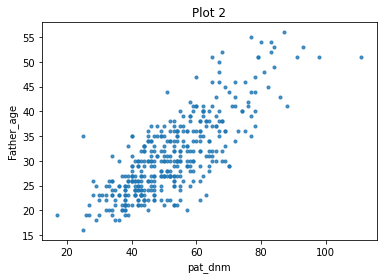

In [16]:
# Create data

x = df_merge["pat_dnm"]
y = df_merge["Father_age"]
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.8)
plt.title('Plot 2')
plt.xlabel('pat_dnm')
plt.ylabel('Father_age')
plt.show()

In [17]:
#model_1 = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = df_merge)
model_1 = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = df_merge)

results_1 = model_1.fit()
results_1.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        18:06:43   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [18]:
#model_2 = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = df_merge)
model_2 = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = df_merge)

results_2 = model_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        18:06:48   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [ ]:
y = 

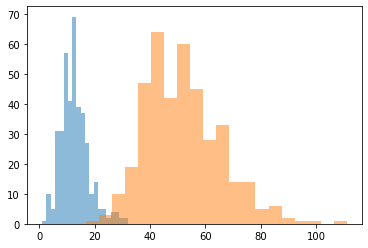

In [19]:
#plot mat_dnm per proband as histogram
fig, ax = plt.subplots()
ax.hist(df_merge["mat_dnm"], bins=20, alpha = 0.5)#increase # of bars?? called bins?
ax.hist(df_merge["pat_dnm"], bins=20, alpha = 0.5)#alpha makes more translucent
plt.show()#could be better to specify the bin size vs the actual bin #

In [20]:
#model_3 = smf.ols(formula = "mat_dnm ~ 1 + pat_dnm", data = df_merge) # im going to get my variables from this dataframe
#model # adding ~1, adding intercept, default value to not be zero, baseline to not be zero
model_3 = smf.poisson(formula = "mat_dnm ~ 1 + pat_dnm", data = df_merge) # im going to get my variables from this dataframe

results_3 = model_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        18:06:54   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_dnm        0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

In [24]:
results_2.params

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [ ]:
math.exp(3.190257 + 0.024096+)